<a href="https://colab.research.google.com/github/mananrajvir/product-recommendations/blob/main/content_based_recommendation_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Product Recommendation**

Product Recommendation is a key tool used by businesses to enhance customer experience. It could be used by service based companies, like Netflix, to reccomend what show you should watch next, or product based services like Amazon that has the "Customers also bought these items..." section.

Reccomendation Systems can use:
1. **Content Based Reccomendations** - Recommend products that are similar to products previously purchased by the customer (utilizes customer preferences based on historical purchase data of the customer)
2. **Collaborative Filtering** - Reccomend products based on purchases made by other customers similar to ther user (utilizes purchases of other customers who have a similar profile to the user)


> For this project, we will be using sales transaction records for Big Basket (an online Grocery Store in India).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
from mlxtend.frequent_patterns import apriori, association_rules
from scipy.spatial.distance import pdist, squareform

pd.set_option('display.max_columns', None)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Other Projects/bigBasket.csv')
df['SKU'] = df['SKU'].astype(object)
df['Order'] = df['Order'].astype(object)
df.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar
5,M09736,6468572,15668478,22-09-2014 22:45,Banana
6,M09736,6468572,21409124,22-09-2014 22:45,Sugar Cubes
7,M09736,6468572,34938526,22-09-2014 22:45,Other Sweets
8,M09736,6468572,15669778,22-09-2014 22:45,Other Dals
9,M09736,6468572,34989440,22-09-2014 22:45,Other Rice Products


In [4]:
#print(df['Description'].unique())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#Remove Non-Meaniful Descriptions
df = df[~df['Description'].isin(['CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books', 'CFLs,cfls,7832553,2,0\n\n7831582,Channa Dal,channa-dal,7832491,2,0\n\n7832360,Cheese,cheese,7832363,2,0\n\n7831689,Chewing Gum,chewing-gum,7831685,2,0\n\n7832047,ChildrenS Books'])]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **EDA**

**Most Popular Items Among All Baskets**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


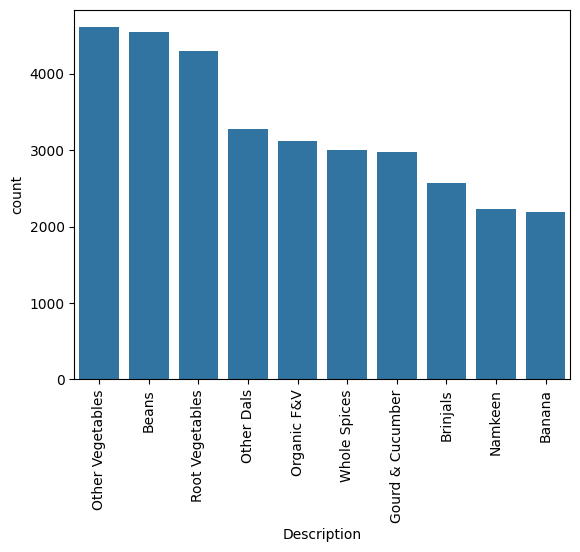

In [6]:
top10 = df['Description'].value_counts().nlargest(10).nlargest(10).index
df_top10 = df[df['Description'].isin(top10)]

sns.countplot(x='Description', data=df_top10, order = top10)
plt.xticks(rotation=90)
plt.show()

However, this list could be skewed by the quantity of each item. For example, Member M09736's order 6468572 has multiple counts of 'Other Dals'.

**Most Frequent Item in Baskets (irrespective of quantity)**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


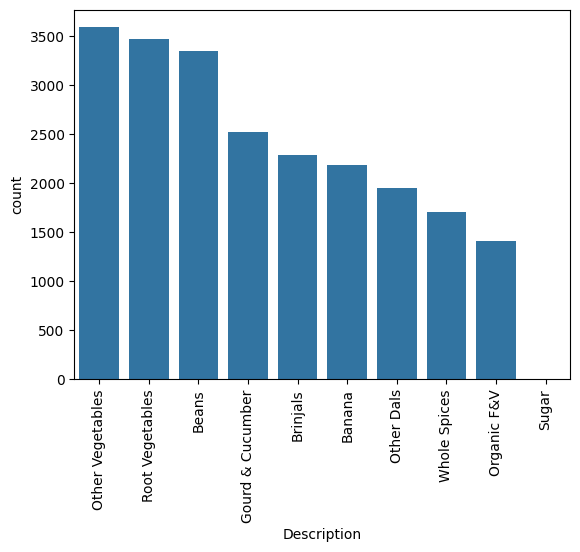

In [7]:
freq_items = df.drop_duplicates(subset = ['Order', 'Description'])

top10_freq = freq_items['Description'].value_counts().nlargest(10).nlargest(10).index
df_top10_freq = freq_items[freq_items['Description'].isin(top10)]

sns.countplot(x='Description', data=df_top10_freq, order = top10_freq)
plt.xticks(rotation=90)
plt.show()

**Busiest Days and Time of Days**

In [8]:
import datetime
df['Created On'] = pd.to_datetime(df['Created On'])
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-22beb3ae4315>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Created On'] = pd.to_datetime(df['Created On'])


,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,2014-09-22 22:45:00,Other Sauces
1,M09736,6468572,15669800,2014-09-22 22:45:00,Cashews
2,M09736,6468572,34989501,2014-09-22 22:45:00,Other Dals
3,M09736,6468572,7572303,2014-09-22 22:45:00,Namkeen
4,M09736,6468572,15669856,2014-09-22 22:45:00,Sugar


In [9]:
#Create a dataframe for unique orders
df_unique = df.drop_duplicates(subset = ['Order'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


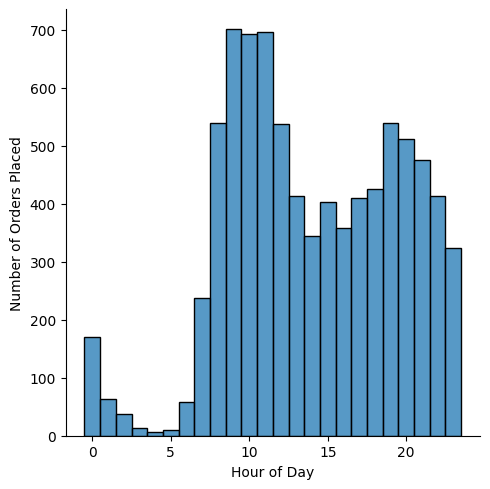

In [10]:
sns.displot(df_unique['Created On'].dt.hour, discrete = True)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders Placed')
plt.show()

We notice that 9am is the busiest time of the day, followed by 11am and 10am. In general, the store has 2 major busy periods - During the morning hours (9 to 11 am), and later in the evening (7 to 9 pm).

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


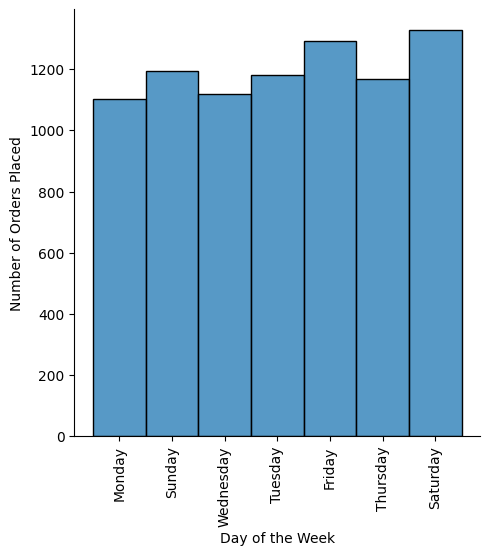

In [11]:
sns.displot(df_unique['Created On'].dt.day_name(), discrete = True)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders Placed')
plt.xticks(rotation=90)
plt.show()

The store is busiest over the weekends, with the highest order days being Saturday, Friday and Sunday.

### **Content Based Recommendation - Apriori Algorithm**

Apriori Algorithm helps us identify items that are frequently bought together. It makes the assumption that all subsets of a frequent itemset must also be frequent.

For a given list of orders, the Apriori Algorithm would:
1. Start with the support for each individual item and drop products whose support is below a minimum threshold (not frequently bought)
2. Make combinations (of 2 products) of the remaining products and drop combinations whose support is less than the minimum threshold
3. Repeat process by increasing the combination size, until no further combinations with support greater than the threshold can be made

In [12]:
#Before we use the Apriori Algorithm, the dataset must be vectorized
df_vectorized = (df.groupby(['Order', 'Description'])['SKU'].size().unstack().reset_index().fillna(0).set_index('Order'))
df_vectorized.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Biscuits,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,Chips,Chocolate,Cleaning & Dust Cloth,Colours,Containers,Cookery Books,Cookies,Cooking Paste,Cooking Sauce,Corn Snacks,Cotton & Bandages,Cream Biscuits,Curd,Cut Vegetables,Cutlery,"Cutters, Peelers & Scrapers",Dairy & Cheese,Diapers & Wipes,Dishwash Liquids & Pastes,Disposable Plates & Utensils,Drain Cleaners,Eggs,Energy Drinks,Energy Powders,Exam Boards,Exotic Vegetables,Eye Care & Kajal,Face Cream,Face Packs & Scrubs,Face Wash,Facial Tissues,Fertilizers & Pesticides,Festive Gift Pack,Festive Gift Packs,Flakes,Floor Cleaners,Foot Care,Frozen Chicken,Frozen Seafood,Frozen Veg Food,Fryums & Papad,Ghee,Glass Cleaners,"Glucose, Marie & Milk Biscuits",Gourd & Cucumber,Green Tea,Grooming,Ground Coffee,Groundnut Oils,Hair Colors & Dyes,Hair Conditioner,Hair Oil,Hand Sanitizer,Hand Wash,Health Drinks,Health Supplements,Healthy & Digestive Biscuits,Healthy Snacks,Heat & Eat Ready Meals,Home & Air Freshener,Honey,Ice Cream,Ice Creams & Desserts,Instant Noodles,Instant Pastas,Jaggery,Jams & Sauces,Ladles & Spatulas,Lip Care,Liquid Detergent,Liquid Soaps & Bars,Magazine,Maida,Mango Juices,Mango Pickle,Mens Deo,Milk,Milk Drinks,Mixed Fruit Jam,Moong Dal,Mosquito Repellent,Mouthwash,"Muffins, Cookies & Rusk",Mukhwas & Mouth Freshener,Mustard Oils,Namkeen,Oats,Office Stationery,Olive Oils,Organic Baby Foods,Organic Branded Foods,Organic Breakfast Cereals,Organic Dals & Pulses,Organic Dry Fruits,Organic Edible Oils & Ghee,Organic F&V,Organic Flours,Organic Juices,Organic Masalas & Spices,Organic Rice & Rice Products,"Organic Salt,Sugar & Jaggery",Other Dals,Other Dry Fruits,Other Flours,Other Insect Repellent,Other Jams,Other Juices,Other Oils,Other Pickle,Other Pooja Needs,Other Rice Products,Other Sauces,Other Soft Drinks,Other Spreads,Other Sweets,Other Vegetables,Packaged Drinking Water,Pain Relievers,Paneer & Tofu,Pasta & Noodles,Pens,Pet Food,Phenyles & Acids,Powdered Spices,Pre & Post Wash Care,Printer Cartridges & Printing Paper,Raisins,Rasagulla & Gulab Jamun,Raw Peanuts,Raw Rice,Ready Baking Mixes,Ready Masalas,Ready Mix,Ready To Eat & Cook,Regular Pasta,Rice Flour,Rodent Control,Root Vegetables,Salty Biscuits,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6422558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [13]:
#Some orders will have multiple quatities of a product (ex: Order 6422636 has Beans: 2.0). We just want to know if the product is present or not (0 or 1)
def convert_to_binary(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

df_vectorized = df_vectorized.applymap(convert_to_binary)
df_vectorized.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-fed03319e15c>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vectorized = df_vectorized.applymap(convert_to_binary)


Description,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Biscuits,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,Chips,Chocolate,Cleaning & Dust Cloth,Colours,Containers,Cookery Books,Cookies,Cooking Paste,Cooking Sauce,Corn Snacks,Cotton & Bandages,Cream Biscuits,Curd,Cut Vegetables,Cutlery,"Cutters, Peelers & Scrapers",Dairy & Cheese,Diapers & Wipes,Dishwash Liquids & Pastes,Disposable Plates & Utensils,Drain Cleaners,Eggs,Energy Drinks,Energy Powders,Exam Boards,Exotic Vegetables,Eye Care & Kajal,Face Cream,Face Packs & Scrubs,Face Wash,Facial Tissues,Fertilizers & Pesticides,Festive Gift Pack,Festive Gift Packs,Flakes,Floor Cleaners,Foot Care,Frozen Chicken,Frozen Seafood,Frozen Veg Food,Fryums & Papad,Ghee,Glass Cleaners,"Glucose, Marie & Milk Biscuits",Gourd & Cucumber,Green Tea,Grooming,Ground Coffee,Groundnut Oils,Hair Colors & Dyes,Hair Conditioner,Hair Oil,Hand Sanitizer,Hand Wash,Health Drinks,Health Supplements,Healthy & Digestive Biscuits,Healthy Snacks,Heat & Eat Ready Meals,Home & Air Freshener,Honey,Ice Cream,Ice Creams & Desserts,Instant Noodles,Instant Pastas,Jaggery,Jams & Sauces,Ladles & Spatulas,Lip Care,Liquid Detergent,Liquid Soaps & Bars,Magazine,Maida,Mango Juices,Mango Pickle,Mens Deo,Milk,Milk Drinks,Mixed Fruit Jam,Moong Dal,Mosquito Repellent,Mouthwash,"Muffins, Cookies & Rusk",Mukhwas & Mouth Freshener,Mustard Oils,Namkeen,Oats,Office Stationery,Olive Oils,Organic Baby Foods,Organic Branded Foods,Organic Breakfast Cereals,Organic Dals & Pulses,Organic Dry Fruits,Organic Edible Oils & Ghee,Organic F&V,Organic Flours,Organic Juices,Organic Masalas & Spices,Organic Rice & Rice Products,"Organic Salt,Sugar & Jaggery",Other Dals,Other Dry Fruits,Other Flours,Other Insect Repellent,Other Jams,Other Juices,Other Oils,Other Pickle,Other Pooja Needs,Other Rice Products,Other Sauces,Other Soft Drinks,Other Spreads,Other Sweets,Other Vegetables,Packaged Drinking Water,Pain Relievers,Paneer & Tofu,Pasta & Noodles,Pens,Pet Food,Phenyles & Acids,Powdered Spices,Pre & Post Wash Care,Printer Cartridges & Printing Paper,Raisins,Rasagulla & Gulab Jamun,Raw Peanuts,Raw Rice,Ready Baking Mixes,Ready Masalas,Ready Mix,Ready To Eat & Cook,Regular Pasta,Rice Flour,Rodent Control,Root Vegetables,Salty Biscuits,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6422558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6422636,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



### **Application 1: Assume that Member M36432 opens the application. What products should be recommended to them? - Apriori Algorithm**



In [14]:
df_member = df[df.Member == 'M36432'].Order.unique()
df_member_orders = df_vectorized[df_vectorized.index.isin(df_member)]
df_member_orders.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Biscuits,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,Chips,Chocolate,Cleaning & Dust Cloth,Colours,Containers,Cookery Books,Cookies,Cooking Paste,Cooking Sauce,Corn Snacks,Cotton & Bandages,Cream Biscuits,Curd,Cut Vegetables,Cutlery,"Cutters, Peelers & Scrapers",Dairy & Cheese,Diapers & Wipes,Dishwash Liquids & Pastes,Disposable Plates & Utensils,Drain Cleaners,Eggs,Energy Drinks,Energy Powders,Exam Boards,Exotic Vegetables,Eye Care & Kajal,Face Cream,Face Packs & Scrubs,Face Wash,Facial Tissues,Fertilizers & Pesticides,Festive Gift Pack,Festive Gift Packs,Flakes,Floor Cleaners,Foot Care,Frozen Chicken,Frozen Seafood,Frozen Veg Food,Fryums & Papad,Ghee,Glass Cleaners,"Glucose, Marie & Milk Biscuits",Gourd & Cucumber,Green Tea,Grooming,Ground Coffee,Groundnut Oils,Hair Colors & Dyes,Hair Conditioner,Hair Oil,Hand Sanitizer,Hand Wash,Health Drinks,Health Supplements,Healthy & Digestive Biscuits,Healthy Snacks,Heat & Eat Ready Meals,Home & Air Freshener,Honey,Ice Cream,Ice Creams & Desserts,Instant Noodles,Instant Pastas,Jaggery,Jams & Sauces,Ladles & Spatulas,Lip Care,Liquid Detergent,Liquid Soaps & Bars,Magazine,Maida,Mango Juices,Mango Pickle,Mens Deo,Milk,Milk Drinks,Mixed Fruit Jam,Moong Dal,Mosquito Repellent,Mouthwash,"Muffins, Cookies & Rusk",Mukhwas & Mouth Freshener,Mustard Oils,Namkeen,Oats,Office Stationery,Olive Oils,Organic Baby Foods,Organic Branded Foods,Organic Breakfast Cereals,Organic Dals & Pulses,Organic Dry Fruits,Organic Edible Oils & Ghee,Organic F&V,Organic Flours,Organic Juices,Organic Masalas & Spices,Organic Rice & Rice Products,"Organic Salt,Sugar & Jaggery",Other Dals,Other Dry Fruits,Other Flours,Other Insect Repellent,Other Jams,Other Juices,Other Oils,Other Pickle,Other Pooja Needs,Other Rice Products,Other Sauces,Other Soft Drinks,Other Spreads,Other Sweets,Other Vegetables,Packaged Drinking Water,Pain Relievers,Paneer & Tofu,Pasta & Noodles,Pens,Pet Food,Phenyles & Acids,Powdered Spices,Pre & Post Wash Care,Printer Cartridges & Printing Paper,Raisins,Rasagulla & Gulab Jamun,Raw Peanuts,Raw Rice,Ready Baking Mixes,Ready Masalas,Ready Mix,Ready To Eat & Cook,Regular Pasta,Rice Flour,Rodent Control,Root Vegetables,Salty Biscuits,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6424887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6429696,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

> **Identify the Item Sets that the member has purchased most frequently in the past:**

In [15]:
frequent_itemsets = apriori(df_member_orders, min_support = 0.1, use_colnames=True)
frequent_itemsets.sort_values(by = 'support', ascending = False).reset_index(drop=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.301980,(Gourd & Cucumber)
1,0.262376,(Other Vegetables)
2,0.212871,(Whole Spices)
3,0.202970,(Organic F&V)
4,0.202970,(Banana)
5,0.198020,(Other Dals)
6,0.193069,(Beans)
7,0.183168,(Avalakki / Poha)
8,0.183168,(Brinjals)
9,0.153465,"(Gourd & Cucumber, Other Vegetables)"


We used a minimum support threshold of 0.1 (itemset should be present in at least 10% of the customer's previous orders).

From the results we see that:
1. Gourd & Cucumber is the first item that should first item recommended to the customer since it is present in 30% of the previous orders.
2. The next most frequent items are - Other Vegetables (26% of previous orders), Whole Spices (21% of previous orders) and Organic F&V (20% of previous orders).
3. It is interesting to see that we also have 3 combinations of products that are present in more than 10% of the previous orders:
  * Beans + Gourd & Cucumber
  * Other Vegetables + Beans
  * Organic f&V + Cucumber

> **Identify how this reccomendation should change once the customer adds a product to the basket**

Besides support, we can also analyze the lift for different item combinations in the dataset. Lift represents how much more likely two items are bought together than if they were bought independently.

Therefore if Lift (X->Y) is greater than 1: it shows that having product X will boost the probability of having product Y.

In [16]:
lift_itemsets = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
lift_itemsets.sort_values(by = ['lift', 'support'], ascending = False).reset_index(drop=True).iloc[:,0:7]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(Gourd & Cucumber),(Brinjals),0.301980,0.183168,0.123762,0.409836,2.237483
1,(Brinjals),(Gourd & Cucumber),0.183168,0.301980,0.123762,0.675676,2.237483
2,(Beans),(Other Vegetables),0.193069,0.262376,0.103960,0.538462,2.052250
3,(Other Vegetables),(Beans),0.262376,0.193069,0.103960,0.396226,2.052250
4,(Gourd & Cucumber),(Other Vegetables),0.301980,0.262376,0.153465,0.508197,1.936901
5,(Other Vegetables),(Gourd & Cucumber),0.262376,0.301980,0.153465,0.584906,1.936901
6,(Beans),(Gourd & Cucumber),0.193069,0.301980,0.108911,0.564103,1.868012
7,(Gourd & Cucumber),(Beans),0.301980,0.193069,0.108911,0.360656,1.868012
8,(Gourd & Cucumber),(Organic F&V),0.301980,0.202970,0.103960,0.344262,1.696122
9,(Organic F&V),(Gourd & Cucumber),0.202970,0.301980,0.103960,0.512195,1.696122


From the results above, we see that once Gourd & Cucumber has been added to the customer's basket, Brinjals should also be recommended. The lift score of 2.24, indicates that the customer is 2.24 times more likely to purchase a Brinjal, if they have already purchased Gourd & Cucumber.

### **Application 2: What Products should be reccomended to member, based on products already added to the cart ("Complete your Order" section)  - Cosine Similarity**

So far, the recommendations for the customer have been based on their past purchases. However, a different way to approach this problem could be:
1. Identiy the items the customer has already added to cart
2. Determine previous orders (by all customers) that were most similar to the current cart
3. Identify what additional products were present in the similar orders, that aren't yet added to the customer's cart

> Create the "Complete Your Order" section for Order 6468572 - **Cosine Similarity**

In [22]:
import copy
df_order = copy.deepcopy(df_vectorized)
df_order = df_order.reset_index()
df_order[df_order.Order == 6468572]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,Order,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Biscuits,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,Chips,Chocolate,Cleaning & Dust Cloth,Colours,Containers,Cookery Books,Cookies,Cooking Paste,Cooking Sauce,Corn Snacks,Cotton & Bandages,Cream Biscuits,Curd,Cut Vegetables,Cutlery,"Cutters, Peelers & Scrapers",Dairy & Cheese,Diapers & Wipes,Dishwash Liquids & Pastes,Disposable Plates & Utensils,Drain Cleaners,Eggs,Energy Drinks,Energy Powders,Exam Boards,Exotic Vegetables,Eye Care & Kajal,Face Cream,Face Packs & Scrubs,Face Wash,Facial Tissues,Fertilizers & Pesticides,Festive Gift Pack,Festive Gift Packs,Flakes,Floor Cleaners,Foot Care,Frozen Chicken,Frozen Seafood,Frozen Veg Food,Fryums & Papad,Ghee,Glass Cleaners,"Glucose, Marie & Milk Biscuits",Gourd & Cucumber,Green Tea,Grooming,Ground Coffee,Groundnut Oils,Hair Colors & Dyes,Hair Conditioner,Hair Oil,Hand Sanitizer,Hand Wash,Health Drinks,Health Supplements,Healthy & Digestive Biscuits,Healthy Snacks,Heat & Eat Ready Meals,Home & Air Freshener,Honey,Ice Cream,Ice Creams & Desserts,Instant Noodles,Instant Pastas,Jaggery,Jams & Sauces,Ladles & Spatulas,Lip Care,Liquid Detergent,Liquid Soaps & Bars,Magazine,Maida,Mango Juices,Mango Pickle,Mens Deo,Milk,Milk Drinks,Mixed Fruit Jam,Moong Dal,Mosquito Repellent,Mouthwash,"Muffins, Cookies & Rusk",Mukhwas & Mouth Freshener,Mustard Oils,Namkeen,Oats,Office Stationery,Olive Oils,Organic Baby Foods,Organic Branded Foods,Organic Breakfast Cereals,Organic Dals & Pulses,Organic Dry Fruits,Organic Edible Oils & Ghee,Organic F&V,Organic Flours,Organic Juices,Organic Masalas & Spices,Organic Rice & Rice Products,"Organic Salt,Sugar & Jaggery",Other Dals,Other Dry Fruits,Other Flours,Other Insect Repellent,Other Jams,Other Juices,Other Oils,Other Pickle,Other Pooja Needs,Other Rice Products,Other Sauces,Other Soft Drinks,Other Spreads,Other Sweets,Other Vegetables,Packaged Drinking Water,Pain Relievers,Paneer & Tofu,Pasta & Noodles,Pens,Pet Food,Phenyles & Acids,Powdered Spices,Pre & Post Wash Care,Printer Cartridges & Printing Paper,Raisins,Rasagulla & Gulab Jamun,Raw Peanuts,Raw Rice,Ready Baking Mixes,Ready Masalas,Ready Mix,Ready To Eat & Cook,Regular Pasta,Rice Flour,Rodent Control,Root Vegetables,Salty Biscuits,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
123,6468572,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Cosine Similarity can be used to identify orders that are most similar to Order 6468572 [index 123]

In [24]:
#Create a cosine similarity matrix comparing the similarity between all orders
cosine_similarity = 1 - pairwise_distances(df_order, metric = 'cosine')
cosine_similarity_df = pd.DataFrame(cosine_similarity)
cosine_similarity_df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2     3         4         5         6         7     \
0  1.000000  0.119523  0.119523   0.0  0.000000  0.000000  0.000000  0.292770   
1  0.119523  1.000000  0.200000   0.0  0.316228  0.565685  0.316228  0.571548   
2  0.119523  0.200000  1.000000   0.0  0.000000  0.141421  0.000000  0.163299   
3  0.000000  0.000000  0.000000   1.0  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.316228  0.000000   0.0  1.000000  0.000000  0.000000  0.129099   

       8     9         10        11        12        13        14        15    \
0  0.218218   0.0  0.000000  0.154303  0.142857  0.133631  0.169031  0.285714   
1  0.182574   0.0  0.424264  0.258199  0.239046  0.111803  0.141421  0.597614   
2  0.182574   0.0  0.424264  0.129099  0.239046  0.000000  0.282843  0.239046   
3  0.000000   0.0  0.000000  0.000000  0.188982  0.000000  0.000000  0.000000   
4  0.000000   0.0  0.223607  0.000000  0.377964  0.176777  0.000000  0.188982   

       16        17        18        19        20        21        22    \
0  0.000000  0.169031  0.142857  0.188982  0.154303  0.338062  0.404061   
1  0.000000  0.424264  0.358569  0.474342  0.000000  0.141421  0.422577   
2  0.000000  0.000000  0.119523  0.316228  0.387298  0.141421  0.253546   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.288675  0.223607  0.377964  0.000000  0.000000  0.000000  0.267261   

       23        24        25        26        27    28        29        30    \
0  0.000000  0.377964  0.000000  0.267261  0.251976   0.0  0.154303  0.267261   
1  0.000000  0.000000  0.478091  0.335410  0.105409   0.0  0.000000  0.223607   
2  0.158114  0.316228  0.119523  0.111803  0.421637   0.0  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.176777  0.000000   0.0  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.176777  0.166667   0.5  0.000000  0.000000   

       31        32        33        34        35        36        37    \
0  0.154303  0.154303  0.094491  0.218218  0.091670  0.285714  0.292770   
1  0.387298  0.387298  0.553399  0.365148  0.000000  0.358569  0.244949   
2  0.258199  0.387298  0.158114  0.273861  0.076696  0.239046  0.244949   
3  0.000000  0.000000  0.125000  0.000000  0.121268  0.188982  0.129099   
4  0.204124  0.204124  0.375000  0.000000  0.121268  0.000000  0.258199   

       38        39        40        41        42        43        44    \
0  0.000000  0.285714  0.188982  0.251976  0.000000  0.218218  0.285714   
1  0.111803  0.478091  0.158114  0.316228  0.365148  0.000000  0.478091   
2  0.000000  0.358569  0.000000  0.105409  0.000000  0.000000  0.298807   
3  0.000000  0.000000  0.250000  0.000000  0.000000  0.000000  0.000000   
4  0.353553  0.188982  0.000000  0.166667  0.288675  0.000000  0.188982   

       45        46        47        48        49        50        51    \
0  0.000000  0.154303  0.329914  0.000000  0.142857  0.188982  0.000000   
1  0.365148  0.516398  0.207020  0.119523  0.239046  0.474342  0.447214   
2  0.182574  0.000000  0.345033  0.000000  0.239046  0.316228  0.000000   
3  0.000000  0.000000  0.000000  0.188982  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.218218  0.188982  0.188982  0.000000  0.176777   

       52        53        54        55        56        57        58    \
0  0.218218  0.154303  0.303046  0.267261  0.267261  0.285714  0.142857   
1  0.365148  0.129099  0.338062  0.447214  0.223607  0.597614  0.239046   
2  0.000000  0.129099  0.253546  0.000000  0.223607  0.000000  0.358569   
3  0.000000  0.204124  0.133631  0.000000  0.000000  0.000000  0.000000   
4  0.144338  0.000000  0.000000  0.000000  0.000000  0.377964  0.000000   

       59        60        61        62        63        64        65    \
0  0.000000  0.239046  0.267261  0.218218  0.154303  0.169031  0.169031   
1  0.350823  0.200000  0.447214  0.547723  0.516398  0.424264  0.424264   
2  0.087706  0.200000  0.372678  0.182574  0.129099  0.282843  0.1

In [28]:
#Identify the index number of orders that are most similar to order 6468572
cosine_similarity_df.iloc[123].sort_values(ascending = False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,123
123,1.000000
791,0.596285
360,0.596285
5786,0.577350
854,0.555556
...,...
5945,0.000000
3705,0.000000
1525,0.000000
3702,0.000000


In [29]:
#Print the Items present in Order 6468572 [index 123], and the 3 most similar orders
df_order.iloc[[123, 791, 360, 5786]]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,Order,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Biscuits,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,Chips,Chocolate,Cleaning & Dust Cloth,Colours,Containers,Cookery Books,Cookies,Cooking Paste,Cooking Sauce,Corn Snacks,Cotton & Bandages,Cream Biscuits,Curd,Cut Vegetables,Cutlery,"Cutters, Peelers & Scrapers",Dairy & Cheese,Diapers & Wipes,Dishwash Liquids & Pastes,Disposable Plates & Utensils,Drain Cleaners,Eggs,Energy Drinks,Energy Powders,Exam Boards,Exotic Vegetables,Eye Care & Kajal,Face Cream,Face Packs & Scrubs,Face Wash,Facial Tissues,Fertilizers & Pesticides,Festive Gift Pack,Festive Gift Packs,Flakes,Floor Cleaners,Foot Care,Frozen Chicken,Frozen Seafood,Frozen Veg Food,Fryums & Papad,Ghee,Glass Cleaners,"Glucose, Marie & Milk Biscuits",Gourd & Cucumber,Green Tea,Grooming,Ground Coffee,Groundnut Oils,Hair Colors & Dyes,Hair Conditioner,Hair Oil,Hand Sanitizer,Hand Wash,Health Drinks,Health Supplements,Healthy & Digestive Biscuits,Healthy Snacks,Heat & Eat Ready Meals,Home & Air Freshener,Honey,Ice Cream,Ice Creams & Desserts,Instant Noodles,Instant Pastas,Jaggery,Jams & Sauces,Ladles & Spatulas,Lip Care,Liquid Detergent,Liquid Soaps & Bars,Magazine,Maida,Mango Juices,Mango Pickle,Mens Deo,Milk,Milk Drinks,Mixed Fruit Jam,Moong Dal,Mosquito Repellent,Mouthwash,"Muffins, Cookies & Rusk",Mukhwas & Mouth Freshener,Mustard Oils,Namkeen,Oats,Office Stationery,Olive Oils,Organic Baby Foods,Organic Branded Foods,Organic Breakfast Cereals,Organic Dals & Pulses,Organic Dry Fruits,Organic Edible Oils & Ghee,Organic F&V,Organic Flours,Organic Juices,Organic Masalas & Spices,Organic Rice & Rice Products,"Organic Salt,Sugar & Jaggery",Other Dals,Other Dry Fruits,Other Flours,Other Insect Repellent,Other Jams,Other Juices,Other Oils,Other Pickle,Other Pooja Needs,Other Rice Products,Other Sauces,Other Soft Drinks,Other Spreads,Other Sweets,Other Vegetables,Packaged Drinking Water,Pain Relievers,Paneer & Tofu,Pasta & Noodles,Pens,Pet Food,Phenyles & Acids,Powdered Spices,Pre & Post Wash Care,Printer Cartridges & Printing Paper,Raisins,Rasagulla & Gulab Jamun,Raw Peanuts,Raw Rice,Ready Baking Mixes,Ready Masalas,Ready Mix,Ready To Eat & Cook,Regular Pasta,Rice Flour,Rodent Control,Root Vegetables,Salty Biscuits,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
123,6468572,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
791,6687487,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

Original Order 6468572: Banana + Cashews + Namkeen + Other Dals + Other Rice Products + Other Sauces + Other Sweets + Sugar + Sugar Cubes

1. Similar Order 1 [6687487]: Banana + Cookies + Namkeen + Other Dals + Sugar
2. Similar Order 2 [6549521]: Banana + Cashews + Other Rice + Raw Peanuts + Sugar Cubes
3. Similar Order 3 [7897662]: Namkeen + Other Dals + Other Sauces

Based on this data, the app should recommend Raw Peanuts and Cookies to the customer, in the "Complete Your Order" section.


> Create the "Complete Your Order" section for Order 6468572 - **Dice Coefficients**

Dice Coefficient, is another feature based similarity method that can be applied to identify orders that are closest to Order 6468572. In this approach, we calculate the dice coefficient for each item combination. This includes taking the items present in the cart, and choosing which items should be added by comparing the similarity to items not present in the cart (based on past orders)

In [32]:
df_dice = copy.deepcopy(df_vectorized)
df_dice = df_dice[df_dice.index == 6468572]
df_dice = df_dice.T.reset_index().rename(columns = {6468572:"Quantity"})

#List of items present in the order
df_dice.loc[df_dice['Quantity'] > 0]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order,Description,Quantity
12,Banana,1
33,Cashews,1
121,Namkeen,1
137,Other Dals,1
146,Other Rice Products,1
147,Other Sauces,1
150,Other Sweets,1
189,Sugar,1
190,Sugar Cubes,1


In [35]:
df_products = df_vectorized.T

a = pdist(df_products, metric = 'dice')
dice_products = pd.DataFrame(1-squareform(a))
dice_products.columns = df_vectorized.columns
dice_products.index = df_vectorized.columns

#Only Interested in Dice Coefficients for products present in the order
dice_products = dice_products[["Banana", "Cashews", "Namkeen", "Other Dals", "Other Rice Products", "Other Sauces", "Other Sweets", "Sugar", "Sugar Cubes"]]
dice_products

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,Banana,Cashews,Namkeen,Other Dals,Other Rice Products,Other Sauces,Other Sweets,Sugar,Sugar Cubes
Description,,,,,,,,,
After Shave,0.000915,0.000000,0.000000,0.000000,0.003356,0.000000,0.000000,0.000000,0.000000
Agarbatti,0.017754,0.033841,0.023130,0.018793,0.030120,0.016000,0.033195,0.022743,0.033613
Almonds,0.119127,0.349664,0.109903,0.148058,0.087971,0.010435,0.020260,0.105547,0.035149
Aluminium Foil & Cling Wrap,0.032787,0.042683,0.041116,0.045999,0.016461,0.010526,0.006536,0.033967,0.000000
Antiseptics,0.000913,0.000000,0.004862,0.003063,0.000000,0.000000,0.000000,0.002976,0.000000
...,...,...,...,...,...,...,...,...,...
Washing Bars,0.005450,0.011111,0.011236,0.005074,0.013051,0.000000,0.000000,0.008850,0.117647
Whole Grains,0.015172,0.013817,0.014008,0.012935,0.046012,0.000000,0.017467,0.012903,0.018692
Whole Spices,0.214286,0.157848,0.196866,0.363289,0.196266,0.021542,0.040426,0.297439,0.020478


In [36]:
# We can create a new field "Max Similarity" as the highest similarity for new/missing products and existing product
dice_products['Max Similarity'] = dice_products.max(axis = 1)
dice_products = dice_products.loc[dice_products['Max Similarity'] != 1] #since similarity between same products = 1
dice_products.sort_values(by  = 'Max Similarity', ascending = False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,Banana,Cashews,Namkeen,Other Dals,Other Rice Products,Other Sauces,Other Sweets,Sugar,Sugar Cubes,Max Similarity
Description,,,,,,,,,,
Moong Dal,0.173205,0.144068,0.167939,0.420370,0.177391,0.016863,0.029186,0.249595,0.006780,0.420370
Root Vegetables,0.408062,0.116675,0.200851,0.317419,0.133760,0.013605,0.037870,0.233680,0.013629,0.408062
Toor Dal,0.202312,0.143493,0.171725,0.386497,0.219134,0.021021,0.052486,0.303749,0.019608,0.386497
Beans,0.370344,0.109100,0.207696,0.329119,0.141588,0.009994,0.037521,0.245517,0.014134,0.370344
Whole Spices,0.214286,0.157848,0.196866,0.363289,0.196266,0.021542,0.040426,0.297439,0.020478,0.363289
...,...,...,...,...,...,...,...,...,...,...
Chocolate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Car Shampoo & Wax,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bottle & Tin Openers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


From the results, we see that the most similar product that should be suggested are:
1. Moong Dal - due to its high dice coefficient (similarity) to Other Dals from the cart
2. Root Vegetables - due to its similarity to Banana in the cart
3. Toor Dal - due to its similarity to Other Dals from the cart